In [20]:
import pandas as pd
A=pd.read_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Dataset/Cust_Segmentation.csv")

#from warnings import filterwarnings
#filterwarnings("ignore")

In [23]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [21]:
A.nunique()

Customer Id        850
Age                 37
Edu                  5
Years Employed      33
Income             129
Card Debt          727
Other Debt         788
Defaulted            2
Address             32
DebtIncomeRatio    245
dtype: int64

In [3]:
A.shape

(850, 10)

In [14]:
B = A[["Income","Age"]]
from Wd8pm import preprocessing,replacer,standardize
replacer(B)
Bnew = standardize(B)
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=3)
model = ag.fit(Bnew)
clusters = model.labels_

In [15]:
B['Clusters']=clusters

In [16]:
B

,Income,Age,Clusters
0,19,41,0
1,100,47,2
2,57,33,0
3,19,29,1
4,253,47,2
...,...,...,...
845,26,27,1
846,34,28,1
847,18,25,1
848,28,32,0


In [17]:
clusters

array([0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,

In [18]:
import matplotlib as plt
import seaborn as sb


<AxesSubplot:xlabel='Age', ylabel='Income'>

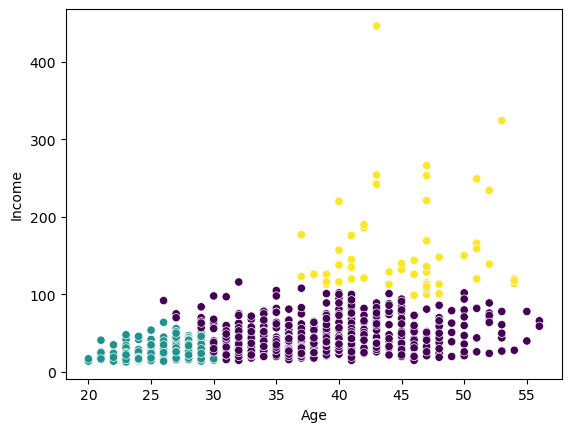

In [24]:
sb.scatterplot(x=B.Age,y=B['Income'],c=clusters)

In [26]:
B = A[["Income","Age","Card Debt"]]
from Wd8pm import preprocessing,replacer,standardize
replacer(B)
Bnew = standardize(B)
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=3)
model = ag.fit(Bnew)
clusters = model.labels_

<AxesSubplot:xlabel='Age', ylabel='Card Debt'>

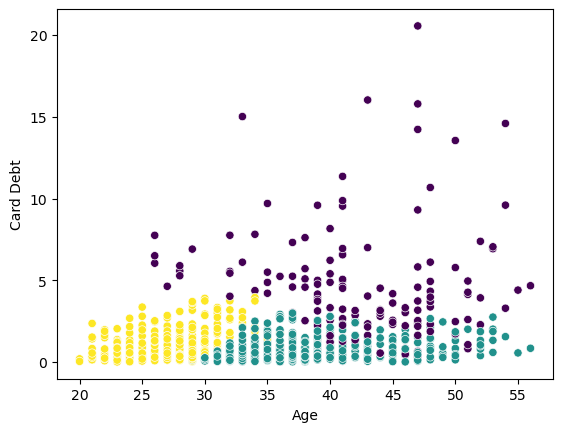

In [28]:
sb.scatterplot(x=B.Age,y=B['Card Debt'],c=clusters)

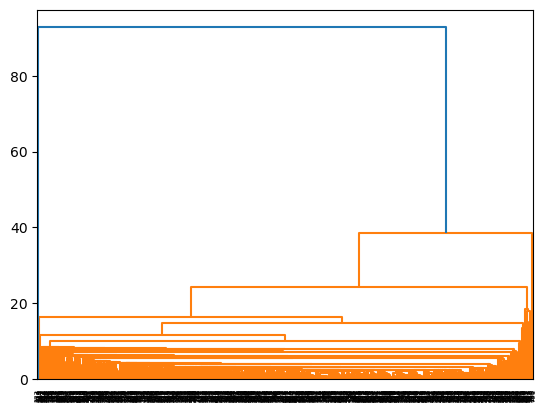

In [29]:
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
dendrogram(linkage(distance_matrix(Bnew.values,Bnew.values)))
plt.show()
